In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config_weather import weather_key

In [1]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key


NameError: name 'weather_key' is not defined

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 74.61,
  'feels_like': 74.97,
  'temp_min': 71.15,
  'temp_max': 76.41,
  'pressure': 1012,
  'humidity': 68},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 220},
 'clouds': {'all': 100},
 'dt': 1653972749,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1653988242,
  'sunset': 1654042411},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itarema
Processing Record 2 of Set 1 | pacific grove
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | san-pedro
Processing Record 5 of Set 1 | puebloviejo
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | sobolevo
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | genhe
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | port macquarie
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | siguiri
Processing Record 17 of Set 1 | nago
Processing Record 18 of Set 1 | lavrentiya
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | uruguaiana
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | nizhneyansk
City not found. Skipp

Processing Record 35 of Set 4 | ilulissat
Processing Record 36 of Set 4 | ampanihy
Processing Record 37 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 4 | fairbanks
Processing Record 39 of Set 4 | pagudpud
Processing Record 40 of Set 4 | tiznit
Processing Record 41 of Set 4 | kokopo
Processing Record 42 of Set 4 | krasnoselkup
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | ust-nera
Processing Record 45 of Set 4 | gornopravdinsk
Processing Record 46 of Set 4 | sabang
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | muscat
Processing Record 49 of Set 4 | shenjiamen
Processing Record 50 of Set 4 | wasco
Processing Record 1 of Set 5 | natitingou
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | kisarawe
Processing Record 4 of Set 5 | leichlingen
Processing Record 5 of Set 5 | nouadhibou
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 | falmouth
P

Processing Record 22 of Set 8 | znamenka
Processing Record 23 of Set 8 | nioro
Processing Record 24 of Set 8 | the valley
Processing Record 25 of Set 8 | klaksvik
Processing Record 26 of Set 8 | saint george
Processing Record 27 of Set 8 | valparaiso
Processing Record 28 of Set 8 | bristol
Processing Record 29 of Set 8 | roatan
Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | tarudant
City not found. Skipping...
Processing Record 32 of Set 8 | muros
Processing Record 33 of Set 8 | moba
Processing Record 34 of Set 8 | bandar-e torkaman
City not found. Skipping...
Processing Record 35 of Set 8 | ushtobe
Processing Record 36 of Set 8 | bawku
Processing Record 37 of Set 8 | ola
Processing Record 38 of Set 8 | guabito
Processing Record 39 of Set 8 | ugoofaaru
Processing Record 40 of Set 8 | formosa do rio preto
Processing Record 41 of Set 8 | marsh harbour
Processing Record 42 of Set 8 | saint albans
Processing Record 43 of Set 8 | plettenberg bay
Processing Record

Processing Record 9 of Set 12 | asau
Processing Record 10 of Set 12 | conakry
Processing Record 11 of Set 12 | sola
Processing Record 12 of Set 12 | aykhal
Processing Record 13 of Set 12 | tame
Processing Record 14 of Set 12 | vanavara
Processing Record 15 of Set 12 | kailua
Processing Record 16 of Set 12 | seddon
Processing Record 17 of Set 12 | obera
Processing Record 18 of Set 12 | beroroha
Processing Record 19 of Set 12 | okha
Processing Record 20 of Set 12 | privokzalnyy
City not found. Skipping...
Processing Record 21 of Set 12 | maiduguri
Processing Record 22 of Set 12 | yacuiba
Processing Record 23 of Set 12 | safaga
Processing Record 24 of Set 12 | kilakarai
Processing Record 25 of Set 12 | sambava
Processing Record 26 of Set 12 | padang
Processing Record 27 of Set 12 | kolomna
Processing Record 28 of Set 12 | ballina
Processing Record 29 of Set 12 | el alto
Processing Record 30 of Set 12 | biak
Processing Record 31 of Set 12 | richards bay
Processing Record 32 of Set 12 | lar

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itarema,-2.9248,-39.9167,75.40,92,59,9.17,BR,2022-05-31 04:57:44
1,Pacific Grove,36.6177,-121.9166,55.81,83,100,13.00,US,2022-05-31 04:53:26
2,New Norfolk,-42.7826,147.0587,51.93,75,100,2.64,AU,2022-05-31 04:56:31
3,San-Pedro,4.7485,-6.6363,76.30,89,49,3.96,CI,2022-05-31 04:57:45
4,Puebloviejo,10.9938,-74.2844,82.58,74,20,3.44,CO,2022-05-31 04:57:46
5,Hermanus,-34.4187,19.2345,55.49,76,1,9.66,ZA,2022-05-31 04:50:55
6,Sobolevo,54.4299,31.8996,52.52,83,86,7.29,RU,2022-05-31 04:52:31
7,Longyearbyen,78.2186,15.6401,46.24,76,20,4.61,SJ,2022-05-31 04:57:47
8,Genhe,50.7833,121.5167,54.46,63,96,3.18,CN,2022-05-31 04:57:47
9,Port Alfred,-33.5906,26.8910,53.19,72,57,7.00,ZA,2022-05-31 04:50:51


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Itarema,BR,2022-05-31 04:57:44,-2.9248,-39.9167,75.40,92,59,9.17
1,Pacific Grove,US,2022-05-31 04:53:26,36.6177,-121.9166,55.81,83,100,13.00
2,New Norfolk,AU,2022-05-31 04:56:31,-42.7826,147.0587,51.93,75,100,2.64
3,San-Pedro,CI,2022-05-31 04:57:45,4.7485,-6.6363,76.30,89,49,3.96
4,Puebloviejo,CO,2022-05-31 04:57:46,10.9938,-74.2844,82.58,74,20,3.44
5,Hermanus,ZA,2022-05-31 04:50:55,-34.4187,19.2345,55.49,76,1,9.66
6,Sobolevo,RU,2022-05-31 04:52:31,54.4299,31.8996,52.52,83,86,7.29
7,Longyearbyen,SJ,2022-05-31 04:57:47,78.2186,15.6401,46.24,76,20,4.61
8,Genhe,CN,2022-05-31 04:57:47,50.7833,121.5167,54.46,63,96,3.18
9,Port Alfred,ZA,2022-05-31 04:50:51,-33.5906,26.8910,53.19,72,57,7.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

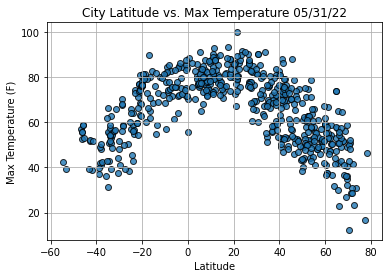

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

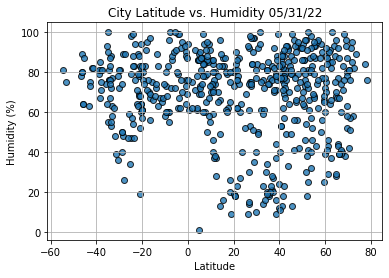

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

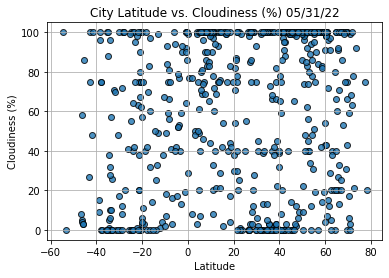

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

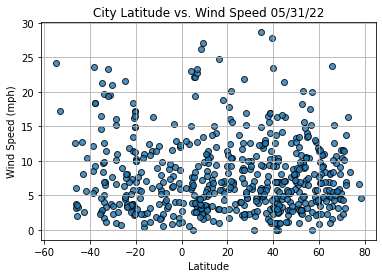

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2022-05-31 04:52:19
Lat                        77.484
Lng                      -69.3632
Max Temp                    16.54
Humidity                       84
Cloudiness                     75
Wind Speed                   6.69
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0.

0      False
1       True
2      False
3       True
4       True
       ...  
557     True
558     True
559     True
560    False
561     True
Name: Lat, Length: 562, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pacific Grove,US,2022-05-31 04:53:26,36.6177,-121.9166,55.81,83,100,13.00
3,San-Pedro,CI,2022-05-31 04:57:45,4.7485,-6.6363,76.30,89,49,3.96
4,Puebloviejo,CO,2022-05-31 04:57:46,10.9938,-74.2844,82.58,74,20,3.44
6,Sobolevo,RU,2022-05-31 04:52:31,54.4299,31.8996,52.52,83,86,7.29
7,Longyearbyen,SJ,2022-05-31 04:57:47,78.2186,15.6401,46.24,76,20,4.61


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

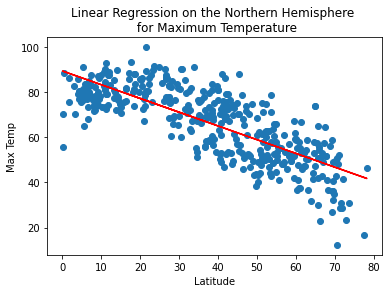

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (5,5))

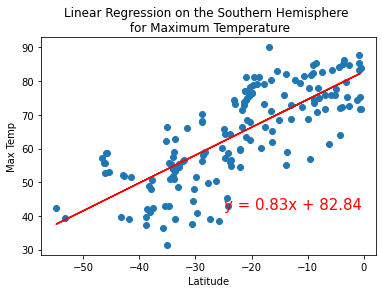

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,42))

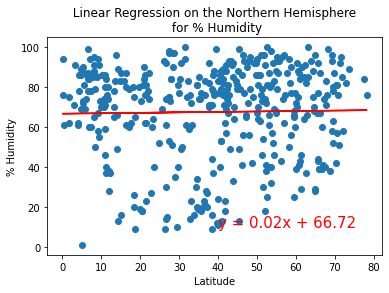

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       ' Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

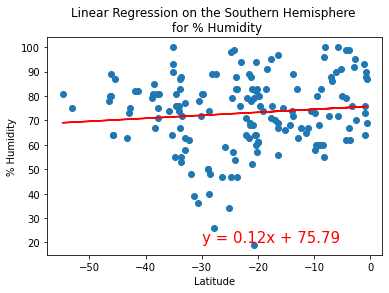

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-30,20))

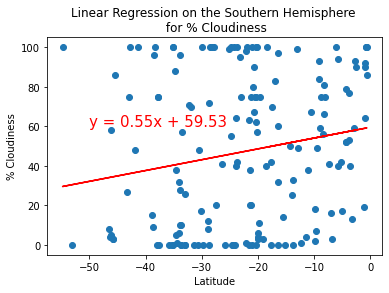

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

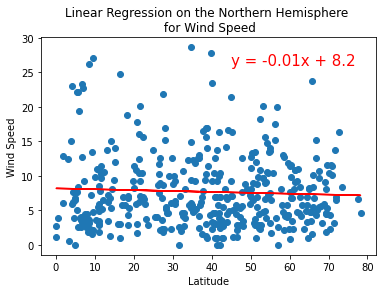

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(45,26))